In [1]:
import matplotlib.pyplot as plt 
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import scipy
#import peakutils
import csv


import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
from sklearn.preprocessing import scale
from collections import Counter
from matplotlib.pyplot import scatter, xlabel, ylabel, savefig

In [2]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
 
df = pd.read_csv('C:\\Users\\kasra\\Desktop\\Machine Learning\\Project\\opendata_tess_ow.csv')
 


df.head()

C:\Users\TOILET4\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.



,YEAR_NUM,MNTH,PROGRAM_NM,OFFICE,FAMILY_TYP_NM,FAMILY_SIZE,AGE,EDUCATION_LEVEL,EARNINGS,IMMIGRATION_STATUS,...,MONTHS_ON_ASSISTANCE,MONTHS_OFF_ASSISTANCE,GENDER,SHELTER_COSTS,YOUNGEST_DEP_AGE_RANGE,WARD_SCODE,CENSUS_NEIGH_SCODE,NEW_CASES,EXITS,CASES
0,2004,20040101,Ontario Works,Application Centre,Families,2,18 to 29 yrs old,High School Incomplete,NaN,Permanent Resident,...,1 to 6 months,1 to 6 months,F,$600 to $999,less than 5 yrs old,2.0,4.0,0,1,1
1,2004,20040101,Ontario Works,Application Centre,Families,2,18 to 29 yrs old,High School Incomplete,NaN,Permanent Resident,...,1 to 6 months,1 to 6 months,F,$400 to $599,less than 5 yrs old,2.0,4.0,0,0,1
2,2004,20040101,Ontario Works,Application Centre,Families,2,18 to 29 yrs old,Post Secondary,NaN,Canadian Citizen,...,1 to 6 months,1 to 6 months,F,$200 to $399,less than 5 yrs old,8.0,24.0,0,0,1
3,2004,20040101,Ontario Works,Application Centre,Families,2,30 to 39 yrs old,High School Complete,Earnings from employment,Canadian Citizen,...,1 to 6 months,7 to 24 months,F,$400 to $599,5 to 10 yrs old,8.0,27.0,0,0,1
4,2004,20040101,Ontario Works,Application Centre,Families,2,30 to 39 yrs old,High School Incomplete,NaN,Canadian Citizen,...,1 to 6 months,1 to 6 months,F,$200 to $399,11 to 15 yrs old,6.0,19.0,0,1,1


In [3]:
df_1=df.replace({'MONTHS_ON_ASSISTANCE':{'7 to 12 months': 9, '1 to 6 months':4, '13 to 24 months':19,
                                           '25 to 60 months':43,'61 to 120 months':91, 'over 120 months':140}, 
                 'AGE':{'50 to 64 yrs old': 58, '30 to 39 yrs old':35, '16 to 17 yrs old':17,
                                           '18 to 29 yrs old':25,'40 to 49 yrs old':45, 
                        '65+ yrs old':70,'Less than 16 yrs old':14},
                'SHELTER_COSTS':{'$600 to $999':800, '$400 to $599':500, '$200 to $399':300, 'Under $200':100, '$1000 to $1399':1200, 
'No shelter costs':0, '$1400 to $1799':1600, 'over $1800':2000},'FAMILY_SIZE':{'1':1,'2':2,'3':3,'4':4,'4+':5},'TIMES_ON_ASSISTANCE':{'0': 0, '1':1,'2':2,'3':3,'4+':4}, 
               'YOUNGEST_DEP_AGE_RANGE': {'No children': 0,'less than 5 yrs old':1 , '5 to 10 yrs old': 1, '11 to 15 yrs old': 1, '16+ yrs old': 1 } })

In [4]:
Data_2014=df_1[df_1['YEAR_NUM']== 2014]
Data_2014=Data_2014.drop(Data_2014.loc[Data_2014['GENDER']=='U'].index)
Data_2014=Data_2014.drop(Data_2014.loc[Data_2014['EDUCATION_LEVEL']=='Unknown'].index)

In [5]:
Data=Data_2014.drop(['YEAR_NUM','MNTH', 'OFFICE', 'PROGRAM_NM', 'NEW_CASES', 'EXITS', 'EARNINGS', 'CENSUS_NEIGH_SCODE', 'MONTHS_OFF_ASSISTANCE','WARD_SCODE', 'CASES                                    '] , axis = 1)

In [6]:
Data.columns

Index(['FAMILY_TYP_NM', 'FAMILY_SIZE', 'AGE', 'EDUCATION_LEVEL',
       'IMMIGRATION_STATUS', 'TIMES_ON_ASSISTANCE', 'MONTHS_ON_ASSISTANCE',
       'GENDER', 'SHELTER_COSTS', 'YOUNGEST_DEP_AGE_RANGE'],
      dtype='object')

In [7]:
Data.groupby(['YOUNGEST_DEP_AGE_RANGE']).mean()

,FAMILY_SIZE,AGE,TIMES_ON_ASSISTANCE,MONTHS_ON_ASSISTANCE,SHELTER_COSTS
YOUNGEST_DEP_AGE_RANGE,,,,,
0,1.041268,40.825378,2.662563,35.082078,403.432593
1,2.969085,38.566016,2.576244,53.407422,737.162575


In [8]:
Data.groupby(['TIMES_ON_ASSISTANCE']).mean()

,FAMILY_SIZE,AGE,MONTHS_ON_ASSISTANCE,SHELTER_COSTS,YOUNGEST_DEP_AGE_RANGE
TIMES_ON_ASSISTANCE,,,,,
1,1.818574,40.321710,43.112724,559.484048,0.401153
2,1.765520,39.782345,43.135557,517.890449,0.391118
3,1.727727,39.066233,41.038703,485.715155,0.377112
4,1.764746,39.995680,41.141476,526.480329,0.365142


In [9]:
Num=Data[['FAMILY_SIZE','AGE','SHELTER_COSTS','TIMES_ON_ASSISTANCE','MONTHS_ON_ASSISTANCE']].copy()

In [10]:
Cat=Data.drop(['FAMILY_SIZE','AGE','SHELTER_COSTS','TIMES_ON_ASSISTANCE','MONTHS_ON_ASSISTANCE'], axis = 1)

In [11]:
Cat.describe()

,YOUNGEST_DEP_AGE_RANGE
count,793322.000000
mean,0.381929
std,0.485860
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [12]:
Cat.head(10)

,FAMILY_TYP_NM,EDUCATION_LEVEL,IMMIGRATION_STATUS,GENDER,YOUNGEST_DEP_AGE_RANGE
8730917,Families,High School Incomplete,Permanent Resident,F,0
8730918,Families,High School Complete,Canadian Citizen,F,1
8730919,Families,High School Complete,Canadian Citizen,F,0
8730920,Families,High School Complete,Canadian Citizen,F,0
8730921,Families,High School Complete,Canadian Citizen,F,1
8730922,Families,High School Complete,Canadian Citizen,F,1
8730923,Families,High School Complete,Canadian Citizen,M,0
8730924,Families,High School Complete,Canadian Citizen,M,0
8730925,Families,High School Complete,Canadian Citizen,M,0
8730926,Families,High School Complete,Canadian Citizen,M,1


In [13]:
Num.describe()

,FAMILY_SIZE,AGE,SHELTER_COSTS,TIMES_ON_ASSISTANCE,MONTHS_ON_ASSISTANCE
count,793322.000000,793322.000000,793322.000000,793322.000000,793322.000000
mean,1.777558,39.962462,530.893887,2.629596,42.081065
std,1.185309,12.480357,362.333173,1.295955,40.314329
min,1.000000,14.000000,0.000000,1.000000,4.000000
25%,1.000000,25.000000,300.000000,1.000000,9.000000
50%,1.000000,35.000000,500.000000,3.000000,19.000000
75%,2.000000,45.000000,800.000000,4.000000,91.000000
max,5.000000,70.000000,2000.000000,4.000000,140.000000


In [14]:
corr_matrix = Num.corr()

In [15]:
corr_matrix["MONTHS_ON_ASSISTANCE"].sort_values(ascending=False)

MONTHS_ON_ASSISTANCE    1.000000
FAMILY_SIZE             0.184114
AGE                     0.163009
SHELTER_COSTS           0.021614
TIMES_ON_ASSISTANCE    -0.023100
Name: MONTHS_ON_ASSISTANCE, dtype: float64

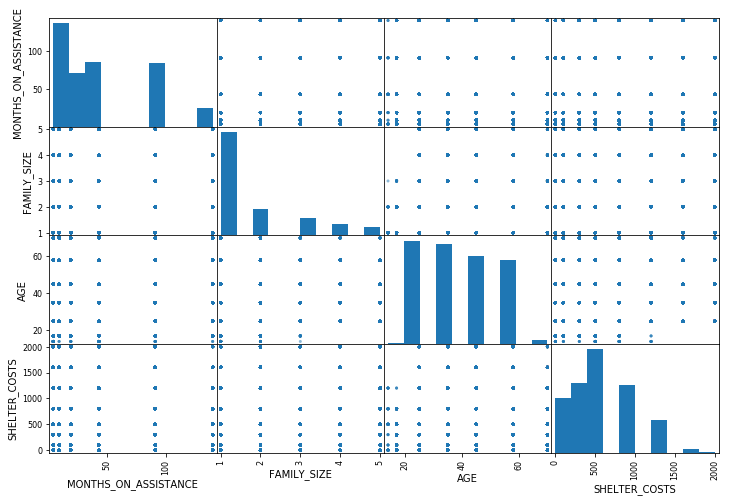

In [15]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["MONTHS_ON_ASSISTANCE", "FAMILY_SIZE", "AGE",
              "SHELTER_COSTS"]
scatter_matrix(Num[attributes], figsize=(12, 8))
plt.savefig("scatter_matrix_plot")

In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(Data, test_size=0.2, random_state=42)

In [17]:
test_set.shape

(158665, 10)

In [18]:
train_set.shape

(634657, 10)

### Prepare data for Machine Learning algorithms

In [19]:
data = train_set.drop("TIMES_ON_ASSISTANCE", axis=1) # drop labels for training set
Target = train_set["TIMES_ON_ASSISTANCE"].copy()

In [20]:
data_num=data[['FAMILY_SIZE','AGE','SHELTER_COSTS','MONTHS_ON_ASSISTANCE']].copy()
data_cat=data.drop(['FAMILY_SIZE','AGE','SHELTER_COSTS','MONTHS_ON_ASSISTANCE'], axis = 1)

In [21]:
from future_encoders import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
Data_cat_1hot = cat_encoder.fit_transform(data_cat)
Data_cat_1hot

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       ...,
       [1., 0., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [22]:
num_attribs = list(data_num)
cat_attribs = list(data_cat)

In [23]:
from sklearn.pipeline import Pipeline
from future_encoders import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from future_encoders import OneHotEncoder

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

data_prepared = full_pipeline.fit_transform(data)
data_prepared.shape


(634657, 19)

In [24]:
X = data_prepared
y = Target
X.shape

(634657, 19)

In [25]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(n_components=2, random_state=42)
pca.fit(data_prepared)
X_reduced = pca.fit_transform(X)
print(X_reduced.shape)
print(data_prepared.shape)

(634657, 2)
(634657, 19)


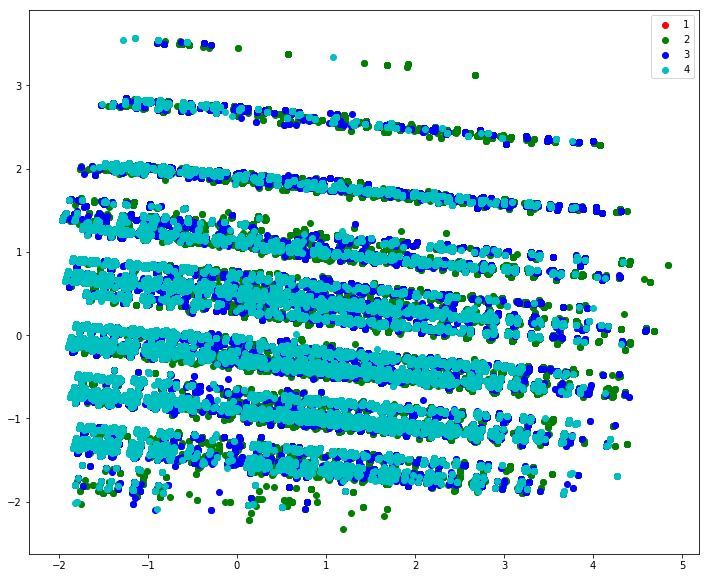

In [26]:
target_ids = range(len(np.unique(y)))

from matplotlib import pyplot as plt
plt.figure(figsize=(12, 10))
colors = 'r', 'g', 'b', 'c', 'm'
for i, c, label in zip(target_ids, colors, np.unique(y)):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

In [50]:
data = train_set.drop("YOUNGEST_DEP_AGE_RANGE", axis=1) # drop labels for training set
Target = train_set["YOUNGEST_DEP_AGE_RANGE"].copy()

In [51]:
data_num=data[['FAMILY_SIZE','AGE','SHELTER_COSTS','MONTHS_ON_ASSISTANCE']].copy()
data_cat=data.drop(['FAMILY_SIZE','AGE','SHELTER_COSTS','MONTHS_ON_ASSISTANCE'], axis = 1)

In [52]:
num_attribs = list(data_num)
cat_attribs = list(data_cat)

In [53]:
from sklearn.pipeline import Pipeline
from future_encoders import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from future_encoders import OneHotEncoder

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

data_prepared = full_pipeline.fit_transform(data)
data_prepared.shape


(634657, 21)

In [54]:
X = data_prepared
y = Target
X.shape

(634657, 21)

In [55]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(n_components=2, random_state=42)
pca.fit(data_prepared)
X_reduced = pca.fit_transform(X)
print(X_reduced.shape)
print(data_prepared.shape)

(634657, 2)
(634657, 21)


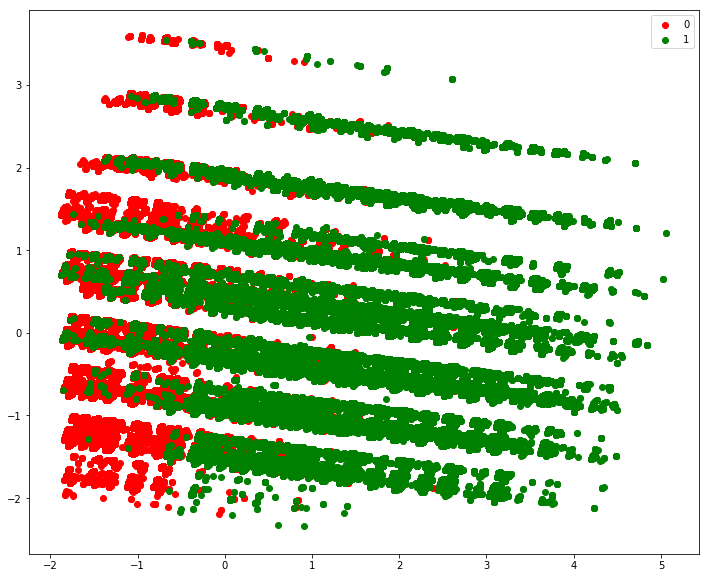

In [56]:
target_ids = range(len(np.unique(y)))

from matplotlib import pyplot as plt
plt.figure(figsize=(12, 10))
colors = 'r', 'g', 'b', 'c', 'm'
for i, c, label in zip(target_ids, colors, np.unique(y)):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])

X_pca_lle_reduced = pca_lle.fit_transform(X)





In [ ]:
target_ids = range(len(np.unique(y)))

from matplotlib import pyplot as plt
plt.figure(figsize=(12, 10))
colors = 'r', 'g', 'b', 'c', 'm'
for i, c, label in zip(target_ids, colors, np.unique(y)):
    plt.scatter(X_pca_lle_reduced[y == i, 0], X_pca_lle_reduced[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

In [19]:
data = train_set.drop("MONTHS_ON_ASSISTANCE", axis=1) # drop labels for training set
data_labels = train_set["MONTHS_ON_ASSISTANCE"].copy()

In [20]:
data_num=data[['FAMILY_SIZE','AGE','SHELTER_COSTS','TIMES_ON_ASSISTANCE']].copy()
data_cat=data.drop(['FAMILY_SIZE','AGE','SHELTER_COSTS','TIMES_ON_ASSISTANCE'], axis = 1)

In [21]:
from future_encoders import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
Data_cat_1hot = cat_encoder.fit_transform(data_cat)
Data_cat_1hot

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [22]:
num_attribs = list(data_num)
cat_attribs = list(data_cat)

In [23]:
from sklearn.pipeline import Pipeline
from future_encoders import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from future_encoders import OneHotEncoder

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

data_prepared = full_pipeline.fit_transform(data)

In [24]:
data_prepared.shape

(634657, 22)

### Select and train models

In [25]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
from sklearn.metrics import mean_squared_error

data_predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

37.33080266254067

In [27]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(data_prepared, data_labels)

C:\Users\TOILET4\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [28]:
data_predictions = forest_reg.predict(data_prepared)
forest_mse = mean_squared_error(data_labels, data_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

33.86599728701118

In [29]:
#from sklearn.svm import SVR

#svm_reg = SVR(kernel="linear")
#svm_reg.fit(data_prepared, data_labels)
#housing_predictions = svm_reg.predict(data_prepared)
#svm_mse = mean_squared_error(data_labels, data_predictions)
#svm_rmse = np.sqrt(svm_mse)
#svm_rmse

### Fine tune the models

In [30]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [31]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, data_prepared, data_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [34.51651606 34.40724064 34.47095608 34.36443408 34.35130792 34.49864846
 34.49015957 34.64594867 34.62636787 34.39005548]
Mean: 34.476163482427594
Standard deviation: 0.09694462270876497


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(data_prepared, data_labels)

In [ ]:
grid_search.best_params_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
scores = cross_val_score(lin_reg, data_prepared, data_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

In [ ]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("MONTHS_ON_ASSISTANCE", axis=1)
y_test = test_set["MONTHS_ON_ASSISTANCE"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)